# Inspect Takahashi pCO2 and flux climatology

In [1]:
%matplotlib inline
from config_calc import *

import os
import sys
import socket
import numpy as np
import xarray as xr

from datetime import datetime
import grid_tools

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

import flux_products

In [11]:
droot = os.path.join(dataroot,'pco2-ldeo')
ds = xr.open_dataset(os.path.join(droot,'ldeo_monthly_clim_v2009_c20150807.nc'))
ds = ds.rename({'FLUXMOLM2Y':'CO2_FLUX'})
ds = ds.drop([k for k in ds.variables if k not in ['CO2_FLUX','date','lon','lat','time']])
ds['area'] = xr.DataArray(np.empty((len(ds.lat),len(ds.lon))),dims=('lat','lon'))
ds.area.values = grid_tools.compute_grid_area(ds.lon.values,ds.lat.values)
ds

total area = 5.1009969907076156e+14
check area = 5.1009969907076156e+14


<xarray.Dataset>
Dimensions:   (lat: 45, lon: 72, time: 12)
Coordinates:
  * lat       (lat) float64 -88.0 -84.0 -80.0 -76.0 -72.0 -68.0 -64.0 -60.0 ...
  * lon       (lon) float64 2.5 7.5 12.5 17.5 22.5 27.5 32.5 37.5 42.5 47.5 ...
  * time      (time) float64 16.0 45.5 75.0 105.5 136.0 166.5 197.0 228.0 ...
Data variables:
    CO2_FLUX  (time, lat, lon) float64 ...
    date      (time) int32 ...
    area      (lat, lon) float64 8.629e+09 8.629e+09 8.629e+09 8.629e+09 ...

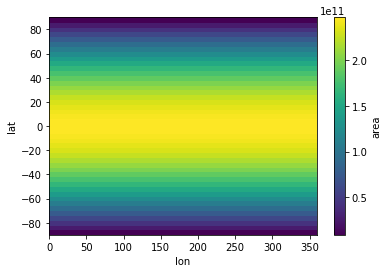

In [12]:
ds.area.plot()

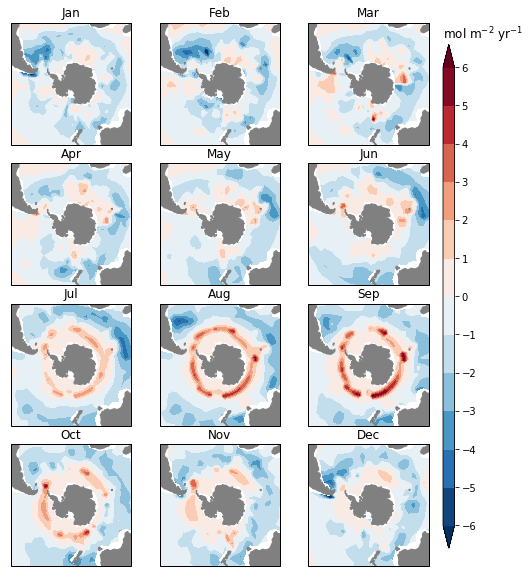

In [4]:
fig = plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(4,3)
levels = np.arange(-6.,7.,1.)
for i in range(4):
    for j in range(3):
        ax = fig.add_subplot(gs[i,j],projection=ccrs.SouthPolarStereo())

        z = ds.CO2_FLUX.isel(time=i*3+j).values
        z,lon = add_cyclic_point(z,coord=ds.lon.values)
        cf = ax.contourf(lon,ds.lat,z,
                         levels = levels,
                         cmap = 'RdBu_r',
                         extend='both',
                         transform=ccrs.PlateCarree())                             
        ax.set_extent([-180, 180, -90, -35], ccrs.PlateCarree())
        land = ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m',edgecolor='face',facecolor='gray'))
        ax.set_title(xcal.month_sname[i*3+j])

cbar_ax = fig.add_axes([0.90, 0.15, 0.02, 0.7])
cb = fig.colorbar(cf,cax=cbar_ax,
                  ticks = levels)
cbar_ax.set_title('mol m$^{-2}$ yr$^{-1}$',loc='left')
gs.update(hspace=0.15,wspace=0)
plt.savefig(os.path.join(diro['fig'],'flux-product-map-so-TAK09.pdf'))

In [13]:
ds.to_netcdf(flux_products.files['TAK09'])